# Basics of deep learning and neural networks
>  In this chapter, you'll become familiar with the fundamental concepts and terminology used in deep learning, and understand why deep learning techniques are so powerful today. You'll build simple neural networks and generate predictions with them.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 1 exercises "Introduction to Deep Learning in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 8)

## Introduction to deep learning

### Comparing neural network models to classical regression models

<div class=""><p>Which of the models in the diagrams has greater ability to account for interactions?</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_3524/datasets/ch1ex2.png" alt="Ch1Ex2"></p></div>

<pre>
Possible Answers

Model 1.

<b>Model 2.</b>

They are both the same.

</pre>

**Model 2 has more nodes in the hidden layer, and therefore, greater ability to capture interactions.**

## Forward propagation

### Coding the forward propagation algorithm

<div class=""><p>In this exercise, you'll write code to do forward propagation (prediction) for your first neural network:</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_3524/datasets/1_4.png" alt="Ch1Ex4"></p>
<p>Each data point is a customer. The first input is how many accounts they have, and the second input is how many children they have. The model will predict how many transactions the user makes in the next year. You will use this data throughout the first 2 chapters of this course. </p>
<p>The input data has been pre-loaded as <code>input_data</code>, and the weights are available in a dictionary called <code>weights</code>. The array of weights for the first node in the hidden layer are in <code>weights['node_0']</code>,
and the array of weights for the second node in the hidden layer are in <code>weights['node_1']</code>.</p>
<p>The weights feeding into the output node are available in <code>weights['output']</code>.</p>
<p>NumPy will be pre-imported for you as <code>np</code> in all exercises.</p></div>

In [ ]:
input_data = np.array([3, 5])
weights = {'node_0': np.array([2, 4]), 
           'node_1': np.array([ 4, -5]), 
           'output': np.array([2, 7])}

Instructions
<ul>
<li>Calculate the value in node 0 by multiplying <code>input_data</code> by its weights <code>weights['node_0']</code> and computing their sum. This is the 1st node in the hidden layer.</li>
<li>Calculate the value in node 1 using <code>input_data</code> and <code>weights['node_1']</code>. This is the 2nd node in the hidden layer.</li>
<li>Put the hidden layer values into an array. This has been done for you.</li>
<li>Generate the prediction by multiplying <code>hidden_layer_outputs</code> by <code>weights['output']</code> and computing their sum. </li>
<li>Hit 'Submit Answer' to print the output!</li>
</ul>

In [ ]:
# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)

-39


**It looks like the network generated a prediction of -39.**

## Activation functions

### The Rectified Linear Activation Function

<div class=""><p>As Dan explained to you in the video, an "activation function" is a function applied at each node. It converts the node's input into some output. </p>
<p>The rectified linear activation function (called <em>ReLU</em>) has been shown to lead to very high-performance networks.
This function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive.  </p>
<p>Here are some examples:<br>
<strong>relu(3) = 3</strong> <br>
<strong>relu(-3) = 0</strong> <br></p></div>

Instructions
<ul>
<li>Fill in the definition of the <code>relu()</code> function:<ul>
<li>Use the <code>max()</code> function to calculate the value for the output of <code>relu()</code>. </li></ul></li>
<li>Apply the <code>relu()</code> function to <code>node_0_input</code> to calculate <code>node_0_output</code>.</li>
<li>Apply the <code>relu()</code> function to <code>node_1_input</code> to calculate <code>node_1_output</code>.</li>
</ul>

In [ ]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(input, 0)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


**You predicted 52 transactions. Without this activation function, you would have predicted a negative number! The real power of activation functions will come soon when you start tuning model weights.**

### Applying the network to many observations/rows of data

<p>You'll now define a function called <code>predict_with_network()</code> which will generate predictions for multiple data observations, which are pre-loaded as <code>input_data</code>. As before, <code>weights</code> are also pre-loaded. In addition, the <code>relu()</code> function you defined in the previous exercise has been pre-loaded.</p>

In [ ]:
input_data = [np.array([3, 5]), np.array([ 1, -1]), 
              np.array([0, 0]), np.array([8, 4])]

Instructions
<ul>
<li>Define a function called <code>predict_with_network()</code> that accepts two arguments - <code>input_data_row</code> and <code>weights</code> - and returns a prediction from the network as the output.</li>
<li>Calculate the input and output values for each node, storing them as: <code>node_0_input</code>, <code>node_0_output</code>, <code>node_1_input</code>, and <code>node_1_output</code>.<ul>
<li>To calculate the input value of a node, multiply the relevant arrays together and compute their sum. </li>
<li>To calculate the output value of a node, apply the <code>relu()</code> function to the input value of the node.</li></ul></li>
<li>Calculate the model output by calculating <code>input_to_final_layer</code> and <code>model_output</code> in the same way you calculated the input and output values for the nodes.</li>
<li>Use a <code>for</code> loop to iterate over <code>input_data</code>:<ul>
<li>Use your <code>predict_with_network()</code> to generate predictions for each row of the <code>input_data</code> - <code>input_data_row</code>. Append each prediction to <code>results</code>.</li></ul></li>
</ul>

In [ ]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)


# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)    

[52, 63, 0, 148]


## Deeper networks

### Forward propagation in a deeper network

<div class=""><p>You now have a model with 2 hidden layers.  The values for an input data point are shown inside the input nodes. The weights are shown on the edges/lines. What prediction would this model make on this data point?</p>
<p>Assume the activation function at each node is the <em>identity function</em>. That is, each node's output will be the same as its input. So the value of the bottom node in the first hidden layer is -1, and not 0, as it would be if the ReLU activation function was used.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_3524/datasets/ch1ex9.png" alt="Ch1Ex9"></p></div>

<pre>
Possible Answers

<b>0.</b>

7.

9.

</pre>

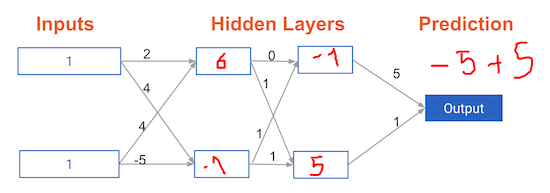

In [ ]:
n0_0 = (1 * -5 + 1 * 4)
n0_0 = (1 * -5 + 1 * 4)

In [ ]:
pred = (3 * 2 + 2 * 1) * 2 + (3 * 0 + 2 * 0) * 2

In [ ]:

pred = (3 * 2 + 2 * 1) * 2 + (3 * 0 + 2 * 0) * 2

error = pred(16) – 5 = 11

### Multi-layer neural networks

<div class=""><p>In this exercise, you'll write code to do forward propagation for a neural network with 2 hidden layers. Each hidden layer has two nodes. The input data has been preloaded as <code>input_data</code>. The nodes in the first hidden layer are called <code>node_0_0</code> and <code>node_0_1</code>. Their weights are pre-loaded as <code>weights['node_0_0']</code> and <code>weights['node_0_1']</code> respectively.</p>
<p>The nodes in the second hidden layer are called <code>node_1_0</code> and <code>node_1_1</code>. Their weights are pre-loaded as <code>weights['node_1_0']</code> and <code>weights['node_1_1']</code> respectively.</p>
<p>We then create a model output from the hidden nodes using weights pre-loaded as <code>weights['output']</code>.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_3524/datasets/ch1ex10.png" alt="Ch1Ex10"></p></div>

In [ ]:
input_data = np.array([3, 5])
weights = {'node_0_0': np.array([2, 4]),
           'node_0_1': np.array([ 4, -5]),
           'node_1_0': np.array([-1,  2]),
           'node_1_1': np.array([1, 2]),
           'output': np.array([2, 7])}

Instructions
<ul>
<li>Calculate <code>node_0_0_input</code> using its weights <code>weights['node_0_0']</code> and the given <code>input_data</code>. Then apply the <code>relu()</code> function to get <code>node_0_0_output</code>.</li>
<li>Do the same as above for <code>node_0_1_input</code> to get <code>node_0_1_output</code>.</li>
<li>Calculate <code>node_1_0_input</code> using its weights <code>weights['node_1_0']</code> and the outputs from the first hidden layer - <code>hidden_0_outputs</code>. Then apply the <code>relu()</code> function to get <code>node_1_0_output</code>.</li>
<li>Do the same as above for <code>node_1_1_input</code> to get <code>node_1_1_output</code>.</li>
<li>Calculate <code>model_output</code> using its weights <code>weights['output']</code> and the outputs from the second hidden layer <code>hidden_1_outputs</code> array. Do not apply the <code>relu()</code> function to this output.</li>
</ul>

In [ ]:
def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = relu((hidden_1_outputs * weights['output']).sum())
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)

182


**The network generated a prediction of 182.**

### Representations are learned


<p>How are the weights that determine the features/interactions in Neural Networks created?</p>

<pre>
Possible Answers

A user chooses them when creating the model.

<b>The model training process sets them to optimize predictive accuracy.</b>

The weights are random numbers.

</pre>

**You will learn more about how Neural Networks optimize their weights in the next chapter!**

### Levels of representation

<p>Which layers of a model capture more complex or "higher level" interactions?</p>

<pre>
Possible Answers

The first layers capture the most complex interactions.

<b>The last layers capture the most complex interactions.</b>

All layers capture interactions of similar complexity.

</pre>

**The last layers capture the most complex interactions.**